In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
excel_file = pd.ExcelFile('D:\\Users\\G S VASU\\Desktop\\Abhirama\\IIT Kharagpur\\Projects\\Irrigation Scheduling\\25 Stations Weather Data\\station_data.xlsx')
dataframes = []
for sheet_name in excel_file.sheet_names:
    df = pd.read_excel('D:\\Users\\G S VASU\\Desktop\\Abhirama\\IIT Kharagpur\\Projects\\Irrigation Scheduling\\25 Stations Weather Data\\station_data.xlsx', sheet_name=sheet_name)
    dataframes.append(df)

In [3]:
station_df = pd.concat(dataframes[2:])
station_df

,Station,Date,Latitude,Longitude,Elevation,max_temp,min_temp,max_RH,min_RH,wind_speed,rainfall,sunshine hours,evaporation,Solar Radiation,ETo,Solar Radiation
0,Akola,2001-01-01,20°42',77°02',282,22.0,17.0,96.0,70.0,5.3,38.2,0.0,1.4,6.43,1.58,NaN
1,Akola,2001-01-02,20°42',77°02',282,23.0,9.6,85.0,45.0,3.4,0.0,3.4,2.2,10.49,2.10,NaN
2,Akola,2001-01-03,20°42',77°02',282,23.8,9.2,71.0,42.0,2.7,0.0,8.3,2.4,16.36,2.56,NaN
3,Akola,2001-01-04,20°42',77°02',282,25.7,8.7,75.0,36.0,3.0,0.0,8.3,3.0,16.39,2.73,NaN
4,Akola,2001-01-05,20°42',77°02',282,26.6,8.1,82.0,34.0,3.2,0.0,8.3,3.2,16.42,2.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Udaipur,2005-12-27,25°21',74°38',433,25.2,3.2,94.0,22.0,1.4,0.0,8.3,2.0,14.73,1.93,NaN
1822,Udaipur,2005-12-28,25°21',74°38',433,27.6,3.7,94.0,38.0,1.6,0.0,8.7,2.0,15.18,2.14,NaN
1823,Udaipur,2005-12-29,25°21',74°38',433,25.8,6.2,89.0,39.0,1.6,0.0,8.7,2.0,15.20,2.08,NaN
1824,Udaipur,2005-12-30,25°21',74°38',433,24.6,4.7,91.0,29.0,2.1,0.0,9.0,2.2,15.55,2.13,NaN


In [4]:
station_df['Date'] = pd.to_datetime(station_df['Date'], format='%Y/%m/%d')
station_df['Julian Day'] = station_df['Date'].dt.dayofyear

In [5]:
def convert_to_radians(angle):
    angle = str(angle)  # Convert angle to string
    parts = angle.split('°')
    degrees = int(parts[0])
    minutes = int(parts[1].rstrip('\''))
    total_minutes = degrees * 60 + minutes
    radians = math.radians(total_minutes / 60)
    return radians

In [6]:
# Apply the conversion function to the "Latitude" and "Longitude" columns
station_df['Latitude (in rad)'] = station_df['Latitude'].apply(convert_to_radians)
station_df['Longitude (in rad)'] = station_df['Longitude'].apply(convert_to_radians)
station_df['wind_speed'] = 5*station_df['wind_speed']/18
station_df['mean_temp'] = station_df[['max_temp', 'min_temp']].mean(axis=1)
station_df['mean_RH'] = station_df[['max_RH', 'min_RH']].mean(axis=1)
station_df['max_DPT'] = (4030 * (235 + station_df['max_temp']) / (4030 - ((station_df['max_temp'] + 235) * np.log(station_df['max_RH'] / 100)))) - 235
station_df['min_DPT'] = (4030 * (235 + station_df['min_temp']) / (4030 - ((station_df['min_temp'] + 235) * np.log(station_df['min_RH'] / 100)))) - 235
station_df['mean_DPT'] = station_df[['max_DPT', 'min_DPT']].mean(axis=1)
columns_order = ['Julian Day','max_temp','min_temp','mean_temp','max_RH','min_RH','mean_RH','max_DPT','min_DPT','mean_DPT','wind_speed','rainfall','sunshine hours','evaporation','Solar Radiation','ETo']
station_df = station_df.reindex(columns=columns_order)
station_df = station_df.dropna(axis = 0)

In [7]:
station_df

,Julian Day,max_temp,min_temp,mean_temp,max_RH,min_RH,mean_RH,max_DPT,min_DPT,mean_DPT,wind_speed,rainfall,sunshine hours,evaporation,Solar Radiation,ETo
0,1,22.0,17.0,19.50,96.0,70.0,83.0,21.332692,11.502201,16.417446,1.472222,38.2,0.0,1.4,6.43,1.58
1,2,23.0,9.6,16.30,85.0,45.0,65.0,20.343297,-1.706623,9.318337,0.944444,0.0,3.4,2.2,10.49,2.10
2,3,23.8,9.2,16.50,71.0,42.0,56.5,18.230408,-2.995692,7.617358,0.750000,0.0,8.3,2.4,16.36,2.56
3,4,25.7,8.7,17.20,75.0,36.0,55.5,20.936986,-5.479922,7.728532,0.833333,0.0,8.3,3.0,16.39,2.73
4,5,26.6,8.1,17.35,82.0,34.0,58.0,23.272909,-6.753502,8.259703,0.888889,0.0,8.3,3.2,16.42,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,361,25.2,3.2,14.20,94.0,22.0,58.0,24.164629,-16.366615,3.899007,0.388889,0.0,8.3,2.0,14.73,1.93
1822,362,27.6,3.7,15.65,94.0,38.0,66.0,26.545480,-9.238557,8.653461,0.444444,0.0,8.7,2.0,15.18,2.14
1823,363,25.8,6.2,16.00,89.0,39.0,64.0,23.847913,-6.667954,8.589979,0.444444,0.0,8.7,2.0,15.20,2.08
1824,364,24.6,4.7,14.65,91.0,29.0,60.0,23.032402,-11.738190,5.647106,0.583333,0.0,9.0,2.2,15.55,2.13


In [9]:
#station_df = station_df[station_df.Station != 'Palampur']

On analysis, it has been clear that on applying StandardScaler transformer, there is not much appreciable change in the accuracy of the model, and hence it has been kept optional.

```
scaler = StandardScaler()
numeric_columns = station_df.select_dtypes(include='number')
normalized_data = scaler.fit_transform(numeric_columns)
normalized_df = pd.DataFrame(normalized_data, columns=list(numeric_columns))
correlation_matrix = normalized_df.corr()



In [9]:
scaler = StandardScaler()
numeric_columns = station_df.select_dtypes(include='number')
normalized_data = scaler.fit_transform(numeric_columns)
normalized_df = pd.DataFrame(normalized_data, columns=list(numeric_columns))
correlation_matrix = normalized_df.corr()

As we go further, the lasso regressor model limits the test data score lower than the vanilla regression, the reason being unnecessary features which have no much significance for training the model.


```
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1)
```



plt.figure(figsize=(10,10))
heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Features which have the highest correlation are max_temp, min_temp, mean_temp, sunshine hours, evaporation and Solar Radiation

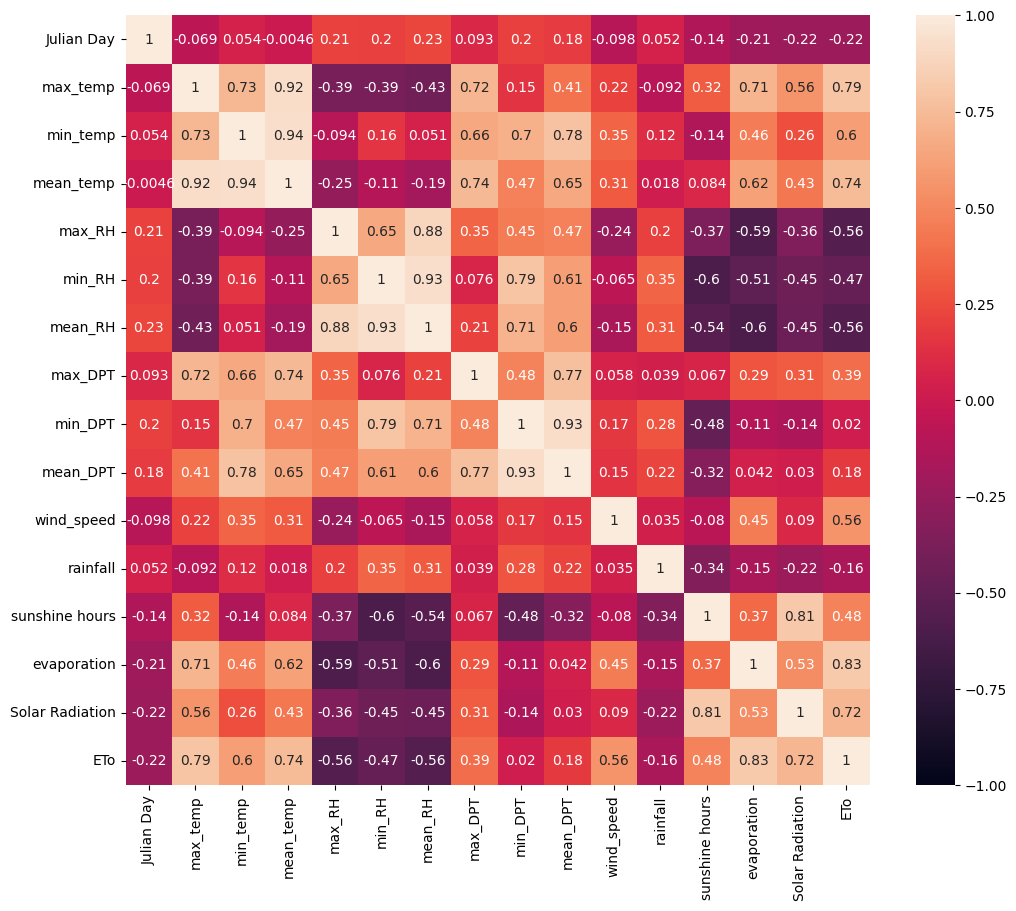

max_temp, min_temp, mean_temp, sunshine hours, evaporation and Solar Radiation

In [ ]:
#use RobustScaler for outlier removal
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric_columns = station_df.select_dtypes(include='number')
normalized_data = scaler.fit_transform(numeric_columns)
normalized_df = pd.DataFrame(normalized_data, columns=list(numeric_columns))

In [8]:
x = station_df.drop(['Julian Day','evaporation','ETo'], axis=1)
y = station_df['ETo']

In [9]:
x.describe()

,max_temp,min_temp,mean_temp,max_RH,min_RH,mean_RH,max_DPT,min_DPT,mean_DPT,wind_speed,rainfall,sunshine hours,Solar Radiation
count,36881.000000,36881.000000,36881.000000,36881.00000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000
mean,30.997881,18.543136,24.770509,81.02470,50.873903,65.949301,26.886618,6.927417,16.907018,1.371415,3.262504,7.062150,17.866406
std,6.002449,6.668527,5.886281,16.54054,21.196621,17.142692,5.840201,9.919078,6.889270,1.000969,12.271658,3.224278,5.158482
min,1.500000,-3.100000,-0.550000,14.00000,3.000000,10.000000,-0.190135,-31.829627,-9.684109,0.000000,0.000000,0.000000,2.168758
25%,28.000000,13.800000,21.350000,73.00000,34.000000,55.000000,24.363040,-0.685673,12.046901,0.694444,0.000000,5.100000,14.240000
50%,31.500000,20.000000,25.900000,87.00000,50.000000,67.500000,27.948991,7.422505,17.774852,1.166667,0.000000,8.100000,18.320000
75%,34.600000,24.000000,28.900000,93.00000,67.000000,79.000000,30.730926,15.328246,22.624549,1.777778,0.000000,9.500000,21.790000
max,46.600000,39.600000,40.900000,100.00000,100.000000,100.000000,44.594579,28.575282,31.986723,25.000000,421.000000,13.200000,29.760000


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size = 0.5,random_state = 42)

In [14]:
#initialize minmaxscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_model_new = RandomForestRegressor()
rf_model_new.fit(x_train_scaled, y_train)
rf_model_new.score(x_test_scaled,y_test)

0.9937375989068369

In [16]:
# Get feature importance scores
feature_importances = rf_model_new.feature_importances_

# Print the scores for each feature
for feature_name, score in zip(x.columns, feature_importances):
    print(feature_name, score*100)

max_temp 52.26923210093738
min_temp 0.6971892683558746
mean_temp 4.211033703432196
max_RH 0.48249831787718883
min_RH 0.2735066790763936
mean_RH 3.208893010392787
max_DPT 0.12324695546360998
min_DPT 0.07780797121085252
mean_DPT 0.09971193034560859
wind_speed 13.700333442580517
rainfall 0.020506221963991142
sunshine hours 2.0813674262669326
Solar Radiation 22.754672972096667


In [18]:
import pickle
with open('RF Model.pickle','wb') as f:
  pickle.dump(rf_model_new,f)

In [22]:
#run a  randomsearchcv to find the best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(10, 1000),
                'max_features': randint(1, 11),
                'max_depth': randint(5, 100),
                'min_samples_leaf': randint(1, 11),
                'bootstrap': [True, False]}
random_search = RandomizedSearchCV(rf_model_new, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(x_train_scaled, y_train)

# Get the best model
rf_model_best = random_search.best_estimator_

In [24]:
rf_model_best.score(x_test_scaled,y_test)

0.9925390452616013

In [17]:
from sklearn.neural_network import MLPRegressor
nn_model_scaled = MLPRegressor()
nn_model_scaled.fit(x_train_scaled, y_train)
nn_model_scaled.score(x_test_scaled,y_test)

0.9976733883563972

In [19]:
import pickle
with open('MLP_model.pickle','wb') as f:
  pickle.dump(nn_model_scaled,f)

In [ ]:
#run a randomsearchcv to find the best parameters for neural network
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'hidden_layer_sizes': randint(10, 1000),
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
                'solver': ['lbfgs', 'sgd', 'adam'],
                'alpha': [0.0001, 0.05],
                'learning_rate': ['constant', 'invscaling', 'adaptive']}
random_search = RandomizedSearchCV(nn_model_scaled, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(x_train_scaled, y_train)


In [30]:
# Get the best model
nn_model_best = random_search.best_estimator_

In [31]:
nn_model_best.score(x_test_scaled,y_test)

0.997256442927369

In [33]:
nn_model_best.score(x_train_scaled,y_train)

0.9975244042768128

In [26]:
from sklearn.svm import SVR
svr_model_scaled = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)
svr_model_scaled.fit(x_train_scaled, y_train)
svr_model_scaled.score(x_test_scaled,y_test)

0.9228386988874259

In [44]:
#run a grid search to find the best parameters for svr_model_scaled
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
grid_search_svr = GridSearchCV(estimator = svr_model_scaled, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)
grid_search_svr.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVR(C=100, gamma=0.1), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [45]:
grid_search_svr.score(x_test_scaled,y_test)

0.951559806683133

In [63]:
grid_search_svr.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [27]:
#create a pipeline with grid_search_svr and grid_search models parallel to each other
from sklearn.ensemble import VotingRegressor
voting_model = VotingRegressor(estimators =[('svr_model_scaled', svr_model_scaled), ('grid_search', grid_search)],weights=[1,1])
voting_model.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


VotingRegressor(estimators=[('svr_model_scaled', SVR(C=10, gamma=0.1)),
                            ('grid_search',
                             GridSearchCV(cv=3,
                                          estimator=RandomForestRegressor(max_depth=100,
                                                                          n_estimators=400,
                                                                          random_state=42),
                                          n_jobs=-1,
                                          param_grid={'bootstrap': [True],
                                                      'max_depth': [100, 200,
                                                                    300, 400],
                                                      'n_estimators': [100, 200,
                                                                       300,
                                                                       400]},
                                          verbose=2))],
                weights=[1, 1])

In [35]:
import xgboost as xgb
xgb_model_scaled = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model_scaled.fit(x_train_scaled, y_train)
xgb_model_scaled.score(x_test_scaled,y_test)

[08:55:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


0.9522741856356275

In [34]:
import pickle
with open('MLP_model_best.pickle','wb') as f:
  pickle.dump(nn_model_best,f)

In [26]:
#show the location of weather data regressor.pickle file
import os
os.getcwd()

'd:\\Users\\G S VASU\\Desktop\\Abhirama\\IIT Kharagpur\\Projects\\Irrigation Scheduling\\25 Stations Weather Data'

In [21]:
x_train.columns

Index(['max_temp', 'min_temp', 'mean_temp', 'max_RH', 'min_RH', 'mean_RH',
       'max_DPT', 'min_DPT', 'mean_DPT', 'wind_speed', 'rainfall',
       'sunshine hours', 'evaporation', 'Solar Radiation'],
      dtype='object')